In [12]:
#This fuction divides the .dat files from Murase creating a new .dat file for each block

time = []
def split_dat_file(input_file):
    with open(input_file, 'r') as f:
        data = f.read()

    blocks = data.strip().split('\n\n')  # Dividi i blocchi utilizzando due righe vuote come separatore
    

    for i, block in enumerate(blocks):
        with open(f'SN_IIn/SNIIn_22_block_{i + 1}.dat', 'w') as f:
            f.write(block)

if __name__ == "__main__":
    input_file = 'FinalFluxs22_IIn.dat'  # inserisci in input_file il file .dat originale di Murase
    split_dat_file(input_file)

In [33]:
'''dati = np.loadtxt('block_2251.dat')
CR = dati[:, -1]

CR_condizione = CR == 1

E = dati[:, 0][CR_condizione]
dN_dE = dati[:, 7][CR_condizione]

new_tab = np.column_stack((E, dN_dE))

# Stampa della nuova tabella
print(new_tab)

np.savetxt('FinalFlux20_IIn_block51.txt', new_tab, fmt='%.5e', delimiter='\t')'''


"dati = np.loadtxt('block_2251.dat')\nCR = dati[:, -1]\n\nCR_condizione = CR == 1\n\nE = dati[:, 0][CR_condizione]\ndN_dE = dati[:, 7][CR_condizione]\n\nnew_tab = np.column_stack((E, dN_dE))\n\n# Stampa della nuova tabella\nprint(new_tab)\n\nnp.savetxt('FinalFlux20_IIn_block51.txt', new_tab, fmt='%.5e', delimiter='\t')"

In [ ]:

#Script per un blocco solo

'''#LIGHT CURVE SN TYPE IIn s=2.2


new_data = np.loadtxt('SN_IIn/SNIIn_22_block_9.dat')
Ev_all = new_data[:,0]
Ev = Ev_all[Ev_all > 3e8]
#Ev = Ev/1e12

block_number=9

S_IIn_start = 1e5 * pow(10., 0.1 * (block_number - 1))
S_IIn_stop = 1e8 * pow(10., 0.1 * (block_number))

# Estrai l'ottava colonna corrispondente ai valori di Ev>1Tev
dN_dEv_all = new_data[:, 7]
dN_dEv = dN_dEv_all[Ev_all > 3e8]
lunghezza_Ev = len(Ev)
print(lunghezza_Ev)
time = np.linspace(S_IIn_start,1e8,len(Ev))


TeV_to_erg=1.60218
eV_to_erg=1.60218*1e-12
GeV_to_erg=1.60218*1e-3

d = 3.0857*1e22
plt.figure(figsize=(10, 5))  # Imposta le dimensioni della figura
plt.subplot(1, 2, 1)  # Subplot 1

light_curve = np.log10(Ev*Ev*(dN_dEv)*eV_to_erg)  #(erg/s)
light_curve1 = np.log10(Ev*Ev*Ev*(dN_dEv)*eV_to_erg)  #(erg^2/s)
plt.plot(time, light_curve)
print(light_curve)


plt.ylim(35,70)
plt.xlabel('t [s]')
plt.ylabel('log($L_v$[erg $s^-1$])')
plt.title('Light Curve SN IIn')
plt.xscale('log')
#lt.xlim(1e3,5e7)

plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time, light_curve1)
#plt.xlim(1e3,5e7)
plt.ylim(35,70)
plt.xscale('log')
plt.xlabel('t[s]')
plt.title('Light Curve SN IIn')
plt.ylabel('log($E_v$$L_v$[$erg^2$ $s^-1$])')
plt.grid()
#plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(Ev_all/1e9, np.log10((Ev_all*Ev_all*(dN_dEv_all/d**2*4*np.pi)))/1e9)
plt.xlim(10e-2,10e7)
plt.ylim(-7,20)
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel('log($Ev^2$$\phi$v)[GeV $cm^-2$]')
plt.grid()
plt.title('Energy fluence SN IIn')




#len(dN_dEv)'''

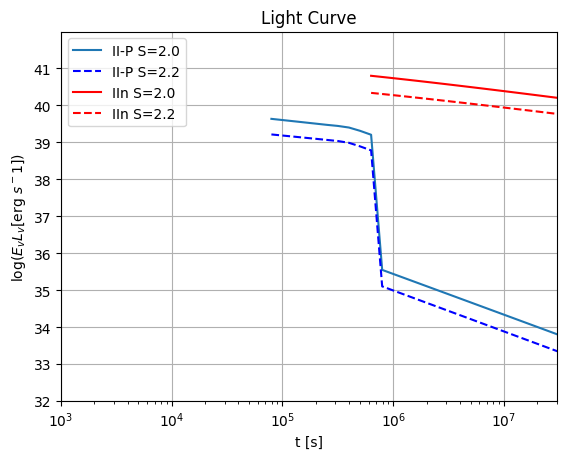

In [15]:
#LIGHT CURVES FROM MURASE PAPER 

import numpy as np
import glob
import matplotlib.pyplot as plt




# Ottenere la lista di tutti i file .dat nella cartella SN_IIn
file_list = glob.glob('SN_IIP/SNIIP_20_block_*.dat')

light_curve_all=[]
time_all = []

file_list_4 = glob.glob('SN_IIP/SNIIP_22_block_*.dat')

light_curve_all_22=[]
time_all_22 = []


block_ranges = [(1, 51)]



for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIP_20_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIp_start = 1e3 * pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all == 1.07461e12]
                dN_dEv = new_data[:, 7][Ev_all == 1.07461e12] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIp_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all.append(light_curve_[0])  
                time_all.append(time[0])                                                                                                                                                      
            
        #print(S_IIn)
        # Plot
                #plt.plot(time[0], light_curve_[0], markersize=15, color='red', marker='*')
                #plt.text(time[0], np.log10(S_IIn * Ev[0] * Ev[0] * Ev[0] * dN_dEv[0]), f'Block {block_number}', fontsize=8)
                #max_idx = np.argmax(np.log10( Ev * Ev * Ev * dN_dEv))

                # Posiziona il titolo sul punto massimo
                #plt.text(time[max_idx], np.log10(
                    #Ev[max_idx] * Ev[max_idx] * Ev[max_idx] * dN_dEv[max_idx]),
                         #f'Block {block_number}', fontsize=8)
                # Imposta il limite sull'asse x solo per il primo subplot
    # Ottenere la lista di tutti i file .dat nella cartella SN_IIn

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list_4:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIP_22_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIp_start = 1e3 * pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all == 1.07461e12]
                dN_dEv = new_data[:, 7][Ev_all == 1.07461e12] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIp_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all_22.append(light_curve_[0])  
                time_all_22.append(time[0])  

file_list_2 = glob.glob('SN_IIn/SNIIn_20_block_*.dat')

light_curve_all_n=[]
time_all_n = []

file_list_3 = glob.glob('SN_IIn/SNIIn_22_block_*.dat')

light_curve_all_n22=[]
time_all_n22 = []

block_ranges = [(1, 51)]



# Calcola il numero totale di subplot
#num_plots = len(block_ranges)

# Calcola il numero di colonne
num_cols = 1 # Modifica a tua discrezione

# Calcola il numero di righe necessarie
num_rows = 4 # Arrotonda per eccesso

# Imposta il numero totale di subplot
#plt.figure(figsize=(10*num_cols, 20))  # Imposta le dimensioni della figura

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list_2:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIn_20_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIn_start = 1e5* pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all == 1.07461e12]
                dN_dEv = new_data[:, 7][Ev_all == 1.07461e12] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIn_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all_n.append(light_curve_[0])  
                time_all_n.append(time[0])     

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list_3:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIn_22_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIn_start = 1e5* pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8

            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all == 1.07461e12]
                dN_dEv = new_data[:, 7][Ev_all == 1.07461e12] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIn_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all_n22.append(light_curve_[0])  
                time_all_n22.append(time[0])     

               
                
 

    # Impostazioni del plot
   
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(time_all, light_curve_all, label='II-P S=2.0')
ax.plot(time_all_22, light_curve_all_22, label='II-P S=2.2', linestyle='--', color='blue')
x2,y2 = zip(*sorted(zip(time_all_n, light_curve_all_n),key=lambda time_all_n: time_all_n[0]))
x3,y3 = zip(*sorted(zip(time_all_n22, light_curve_all_n22),key=lambda time_all_n22: time_all_n22[0]))
ax.plot(x2, y2, linestyle='-', label='IIn S=2.0', color='red')
ax.plot(x3, y3, linestyle='--', label='IIn S=2.2', color='red')
    #ax.set_xlim(xmin=32,xmax=42)
yvalues=np.arange(32,42,1)
plt.ylim(32,42)
plt.yticks(yvalues)
plt.xlim(1e3,3e7)
    #plt.axis('auto')
plt.xlabel('t [s]')
plt.ylabel('log($E_v$$L_v$[erg $s^-1$])')
plt.title(f'Light Curve')
plt.xscale('log')
plt.legend(loc='upper left')
plt.grid(True)
    
    
    
    

plt.show()
    
    # Attendi l'input dell'utente prima di mostrare il prossimo subplot
    #input("Premi INVIO per mostrare il prossimo subplot:")




C:\Users\Asus\AppData\Local\Temp\ipykernel_3540\1816475280.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(Ev, np.log10(dN_dEv))


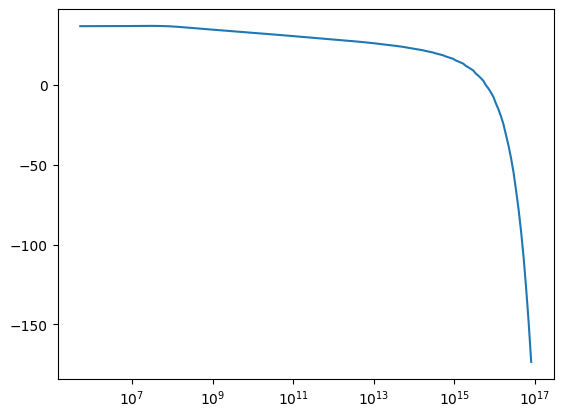

In [21]:
#vogliamo plottare la colonna 1 e la colonna 8 fissato t, quindi un solo blocco, prendiamo il primo blocco con CR=1.
#Ev*Ev*dN_dEv  vs Ev
dati_n = np.loadtxt('SN_IIn/SNIIn_20_block_9.dat')
Ev = dati_n[:, 0]
dN_dEv = dati_n[:,7]

plt.plot(Ev, np.log10(dN_dEv))
plt.xscale('log')
plt.show()


ValueError: not enough values to unpack (expected 2, got 0)

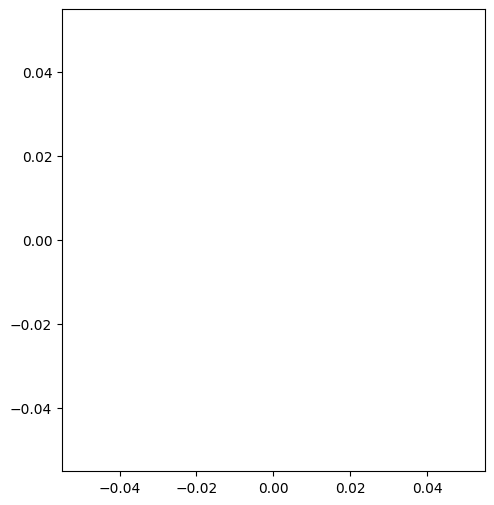

In [6]:
import numpy as np
import glob
import matplotlib.pyplot as plt




# Ottenere la lista di tutti i file .dat nella cartella SN_IIn
file_list = glob.glob('SN_IIP/SNIIP_20_block_*.dat')
light_curve_all_Ev=[]
light_curve_all=[]
time_all = []


block_ranges = [(1, 51)]

# Calcola il numero totale di subplot
#num_plots = len(block_ranges)

# Calcola il numero di colonne
num_cols = 1 # Modifica a tua discrezione

# Calcola il numero di righe necessarie
num_rows = 4 # Arrotonda per eccesso

# Imposta il numero totale di subplot
#plt.figure(figsize=(10*num_cols, 20))  # Imposta le dimensioni della figura

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIP_20_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIp_start = 1e3 * pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all > 3e8]
                dN_dEv = new_data[:, 7][Ev_all > 3e8] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIp_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all.append(light_curve_[0]) 

                light_curve_Ev=np.log10(Ev * Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_Ev=np.asarray(light_curve_Ev)

                light_curve_all_Ev.append(light_curve_Ev[0])  
                time_all.append(time[0])                                                                                                                                                      
            
        #print(S_IIn)
        # Plot
                #plt.plot(time[0], light_curve_[0], markersize=15, color='red', marker='*')
                #plt.text(time[0], np.log10(S_IIn * Ev[0] * Ev[0] * Ev[0] * dN_dEv[0]), f'Block {block_number}', fontsize=8)
                #max_idx = np.argmax(np.log10( Ev * Ev * Ev * dN_dEv))

                # Posiziona il titolo sul punto massimo
                #plt.text(time[max_idx], np.log10(
                    #Ev[max_idx] * Ev[max_idx] * Ev[max_idx] * dN_dEv[max_idx]),
                         #f'Block {block_number}', fontsize=8)
                # Imposta il limite sull'asse x solo per il primo subplot
    # Ottenere la lista di tutti i file .dat nella cartella SN_IIn

file_list_2 = glob.glob('SN_IIn/SNIIn_20_block_*.dat')

light_curve_all_n=[]
light_curve_all_n_Ev = []
time_all_n = []

block_ranges = [(1, 51)]



# Calcola il numero totale di subplot
#num_plots = len(block_ranges)

# Calcola il numero di colonne
num_cols = 1 # Modifica a tua discrezione

# Calcola il numero di righe necessarie
num_rows = 4 # Arrotonda per eccesso

# Imposta il numero totale di subplot
#plt.figure(figsize=(10*num_cols, 20))  # Imposta le dimensioni della figura

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list_2:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIn_20_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIn_start = 1e5* pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all > 3e8]
                dN_dEv = new_data[:, 7][Ev_all > 3e8] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIn_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all_n.append(light_curve_[0]) 

                light_curve_n_Ev=np.log10(Ev * Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_n_Ev=np.asarray(light_curve_n_Ev)

                light_curve_all_n_Ev.append(light_curve_n_Ev[0])  
                time_all_n.append(time[0])                    
                
 

    # Impostazioni del plot
   
    fig=plt.figure(figsize=[12,6])
    ax=fig.add_subplot(121)

    ax.plot(time_all, light_curve_all, label='II-P')
    x2,y2 = zip(*sorted(zip(time_all_n, light_curve_all_n),key=lambda time_all_n: time_all_n[0]))
    ax.plot(x2, y2, linestyle='--', label='IIn')
    yvalues=np.arange(32,42,1)
    plt.ylim(32,42)
    plt.yticks(yvalues)
    plt.xlim(1e3,3e7)
    #plt.axis('auto')
    plt.xlabel('t [s]')
    plt.ylabel('log($L_v$[erg $s^-1$])')
    plt.title(f'Light Curve')
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.grid(True)
    #ax.set_xlim(xmin=32,xmax=42)
    ax=fig.add_subplot(122)
    ax.plot(time_all, light_curve_all_Ev, label='II-P')
    x3,y3 = zip(*sorted(zip(time_all_n, light_curve_all_n_Ev),key=lambda time_all_n: time_all_n[0]))
    ax.plot(x3, y3, linestyle='--', label='IIn')
    #yvalues=np.arange(32,42,1)
    plt.ylim(40,50)
    #plt.yticks(yvalues)
    plt.xlim(1e3,3e7)
    #plt.axis('auto')
    plt.xlabel('t [s]')
    plt.ylabel('log(Ev$L_v$[$erg^2$ $s^-1$])')
    plt.title(f'Light Curve')
    plt.xscale('log')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Imposta limiti dinamici agli assi
    
    '''if idx == 2 or idx ==3:
    
        plt.ylim(25, 30)  # Imposta il limite sull'asse x tra 1e6 e 1e7
        plt.xlim(8*1e5,1e7)
    if idx==4:
        plt.xlim(3*1e7, 1e8)
    if idx==5:
        plt.xlim(1e8,1e9)
    if idx==6:
        plt.ylim(10,35)'''

    plt.show()
    
    # Attendi l'input dell'utente prima di mostrare il prossimo subplot
    #input("Premi INVIO per mostrare il prossimo subplot:")

ValueError: not enough values to unpack (expected 2, got 0)

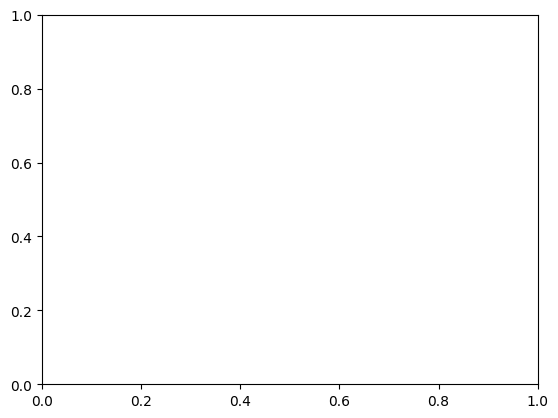

In [3]:
file_list_2 = glob.glob('SN_IIn/SNIIn_20_block_*.dat')

light_curve_all_n=[]
time_all_n = []

block_ranges = [(1, 51)]
fig=plt.figure()


# Calcola il numero totale di subplot
#num_plots = len(block_ranges)

# Calcola il numero di colonne
num_cols = 1 # Modifica a tua discrezione

# Calcola il numero di righe necessarie
num_rows = 4 # Arrotonda per eccesso

# Imposta il numero totale di subplot
#plt.figure(figsize=(10*num_cols, 20))  # Imposta le dimensioni della figura

for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    #plt.subplot(num_rows, num_cols, idx)
    

    for file_name in file_list_2:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIn_20_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
        #print(block_number)
        # Calcola S_IIn basato sul numero di blocco

            S_IIn_start = 1e5* pow(10., 0.1 * (block_number - 1))
            #S_IIp_stop = 1e5 * pow(10., 0.1 * (block_number))
            #if S_IIn_stop > 1e8:
                #S_IIn_stop==1e8


                
            
        
            eV_to_erg=1.60218*1e-12

            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            
            if new_data[-1, -1] == 1:
                #print(block_number)
                Ev_all = new_data[:, 0]
                Ev = Ev_all[Ev_all > 3e8]
                dN_dEv = new_data[:, 7][Ev_all > 3e8] 
                lunghezza_Ev = len(Ev)
                time = np.linspace(S_IIn_start, 1e8, lunghezza_Ev)

                light_curve_=np.log10(Ev * Ev * dN_dEv *eV_to_erg)
                light_curve_=np.asarray(light_curve_)

                light_curve_all_n.append(light_curve_[0])  
                time_all_n.append(time[0])   
            
            #plt.text(time, light_curve_, f'{block_number}') 


ax=fig.add_subplot(111)
x2,y2 = zip(*sorted(zip(time_all_n, light_curve_all_n),key=lambda time_all_n: time_all_n[0]))

ax.plot(x2, y2, markersize=12, color='red', marker='*', linestyle='-')
    #ax.set_xlim(xmin=32,xm"ax=42)
#plt.ylim(32,42)
#plt.xlim(1e3,1e8)
    #plt.axis('auto')
plt.xlabel('t [s]')
plt.ylabel('Neutrino Rates')
plt.title(f'Light Curve SN IIn - Blocks {start_block} to {end_block}')
plt.xscale('log')
plt.grid(True)    

(32.0, 42.0)

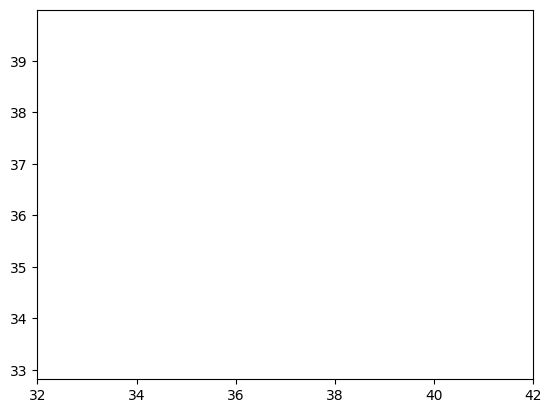

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(time_all, light_curve_all)
ax.set_xlim(xmin=32,xmax=42)
    #plt.xlim(1e5,1e8)
    #plt.axis('auto')
    

In [39]:
dati = np.loadtxt('FinalFluxs20_IIn.dat')
CR = dati[:, -1]
if (CR == 1).all() :

    E = dati[:, 0]
    print(len(E))
    Et = E[E > 1e12]
    
    dN_dE = dati[:, 7][E>1e12]
    lunghezza_Et = len(Et)

print(len(Et))
#plt.plot(all_time, Et*Et*Et*dN_dE)


NameError: name 'Et' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file .dat
with open('FinalFluxs20_IIn.dat', 'r') as file:
    lines = file.readlines()

# Trova le righe vuote che separano i blocchi
empty_lines = [i for i, line in enumerate(lines) if line.strip() == '']

# Inizializza il vettore temporale e i vettori per la prima e la settima colonna
full_time = []
first_column = []
seventh_column = []

# Calcola l'andamento del tempo per ogni blocco
for i in range(len(empty_lines)):
    start_line = empty_lines[i] + 2 if i > 0 else 0  # Considera due righe vuote come inizio del nuovo blocco
    end_line = empty_lines[i+1] if i+1 < len(empty_lines) else len(lines)

    # Estrai il tempo di inizio e fine per il blocco corrente
    start_time = 1e5 * pow(10., 0.1 * i)  # Il tempo di inizio del blocco è calcolato in base all'indice del blocco
    end_time = 1e5 * pow(10., 0.1 * (i+1)) if i+1 < len(empty_lines) else 1e8  # Tempo di fine dell'ultimo blocco

    # Controllo della condizione sull'ultima colonna
    last_column_values = [int(line.split()[-1]) for line in lines[start_line:end_line]]
    if all(value == 1 for value in last_column_values):
        # Aggiungi il vettore temporale per il blocco corrente
        time_block = np.linspace(start_time, end_time, end_line - start_line)
        full_time.extend(time_block)

        # Estrai la prima e la settima colonna per il blocco corrente
        first_column.extend([float(line.split()[0]) for line in lines[start_line:end_line]])
        seventh_column.extend([float(line.split()[7]) for line in lines[start_line:end_line]])

# Converti i vettori in array numpy
full_time = np.array(full_time)
first_column = np.array(first_column)
seventh_column = np.array(seventh_column)

# Plot dei dati con il nuovo vettore temporale
plt.plot(full_time, first_column*first_column*first_column*seventh_column, label='Prima colonna')
plt.plot(full_time, seventh_column, label='Settima colonna')
plt.xlabel('Tempo')
plt.ylabel('Dati')
plt.title('Plot dei dati della prima e settima colonna')
plt.legend()
plt.show()



IndexError: list index out of range

80


C:\Users\veron\AppData\Local\Temp\ipykernel_25820\3662760918.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, np.log10(Ev22*Ev22*Ev22*dN_dEv22))


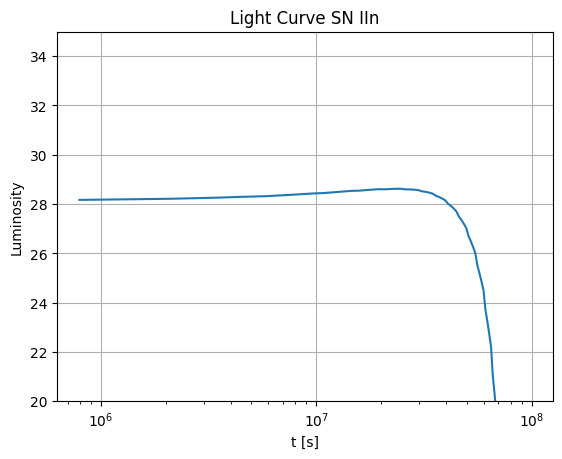

In [ ]:
#LIGHT CURVE SN TYPE IIn s=2.2


new_data22 = np.loadtxt('SN_IIn/SNIIn_22_block_9.dat')
Ev_all22 = new_data22[:,0]
Ev22 = Ev_all22[Ev_all22 > 1e12]
Ev22 = Ev22/1e9

# Estrai l'ottava colonna corrispondente ai valori di Ev>1Tev
dN_dEv22 = new_data22[:, 7][Ev_all22 > 1e12]
dN_dEv22 = dN_dEv22/1e9
lunghezza_Ev22 = len(Ev22)
print(lunghezza_Ev22)
time = np.linspace(S_IIn,1e8,lunghezza_Ev22)


GeV_to_erg=0.0016021773

#plt.figure(figsize=(10, 5))  # Imposta le dimensioni della figura
#plt.subplot(1, 2, 1)  # Subplot 1
plt.plot(time, np.log10(Ev22*Ev22*Ev22*dN_dEv22))
plt.ylim(20,35)
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel('Luminosity')
plt.title('Light Curve SN IIn')
#plt.xscale('log')
plt.grid(True)

C:\Users\veron\AppData\Local\Temp\ipykernel_24440\1014191038.py:34: RuntimeWarning: divide by zero encountered in log10
  light_curve_p = np.log10(Evp*Evp*(dN_dEvp)*eV_to_erg)  #(erg/s)
C:\Users\veron\AppData\Local\Temp\ipykernel_24440\1014191038.py:35: RuntimeWarning: divide by zero encountered in log10
  light_curve1_p = np.log10(Evp*Evp*Evp*(dN_dEvp)*eV_to_erg)  #(erg^2/s)


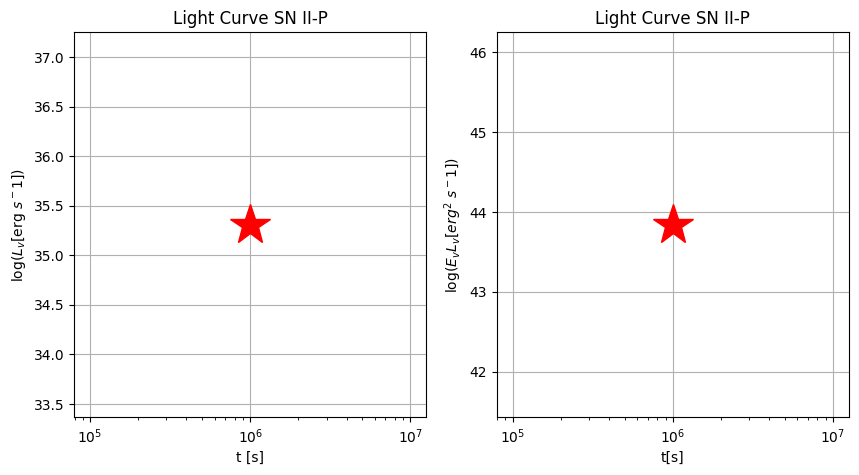

In [ ]:
#LIGHT CURVE SN TYPE II-P s=2.0

file_list_1=glob.glob('SN_IIP/SNIIP_20_block_*.dat')
#new_datap = np.loadtxt('SN_IIP/SNIIP_20_block_*.dat')

for file_name1 in file_list_1:
    block_number = int(file_name.split('SNIIP_20_block_')[-1].split('.')[0])

    for b in block_number:
        

        Ev_allp = new_datap[:,0]
        Evp = Ev_allp[Ev_allp > 3e8]


#block_number=31


# Estrai l'ottava colonna corrispondente ai valori di Ev>1Tev
dN_dEvp_all = new_datap[:, 7]
dN_dEvp = new_datap[:, 7][Ev_allp > 3e8]


S_IIp_start = 1e3 * pow(10., 0.1 * (block_number - 1))
S_IIp_stop = 1e8 * pow(10., 0.1 * (block_number))




time = np.linspace(S_IIp_start,S_IIp_stop,len(Evp))


TeV_to_erg=1.60218
eV_to_erg=1.60218*1e-12
GeV_to_erg=1.60218*1e-3

d = 3.0857*1e22
plt.figure(figsize=(10, 5))  # Imposta le dimensioni della figura
plt.subplot(1, 2, 1)  # Subplot 1

light_curve_p = np.log10(Evp*Evp*(dN_dEvp)*eV_to_erg)  #(erg/s)
light_curve1_p = np.log10(Evp*Evp*Evp*(dN_dEvp)*eV_to_erg)  #(erg^2/s)


plt.plot(S_IIp_start, light_curve_p[0], markersize=30, color='red', marker='*' )
#plt.ylim(35,70)
plt.xlabel('t [s]')
plt.ylabel('log($L_v$[erg $s^-1$])')
plt.title('Light Curve SN II-P')
plt.xscale('log')
#lt.xlim(1e3,5e7)

plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(S_IIp_start, light_curve1_p[0],markersize=30, color='red', marker='*')
#plt.xlim(1e3,5e7)
#plt.ylim(35,70)
plt.xscale('log')
plt.xlabel('t[s]')
plt.title('Light Curve SN II-P')
plt.ylabel('log($E_v$$L_v$[$erg^2$ $s^-1$])')
plt.grid()

#len(dN_dEv)

80


C:\Users\veron\AppData\Local\Temp\ipykernel_25820\2756848288.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(timep, np.log10(S_IIP*S_IIP*Evp22*Evp22*Evp22*dN_dEvp22))


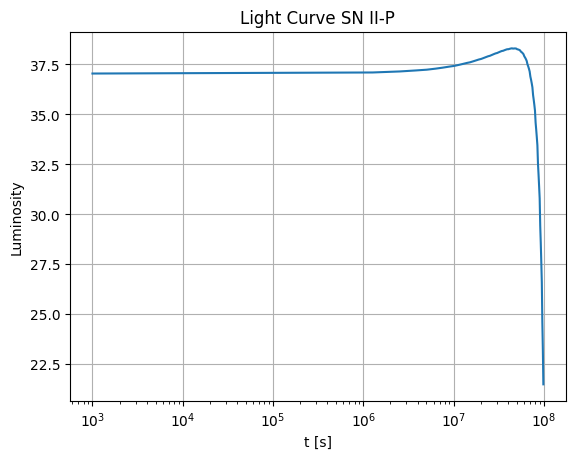

In [ ]:

#LIGHT CURVE SN TYPE II-P s=2.2

new_datap22 = np.loadtxt('SN_IIP/SNIIP_22_block_20.dat')
Ev_allp22 = new_datap22[:,0]
Evp22 = Ev_allp22[Ev_allp22 > 1e12]
Evp22= Evp22/1e9

# Estrai la seconda colonna corrispondente ai valori di Ev
dN_dEvp_all22 = new_datap22[:, 7]
dN_dEvp22 = new_datap22[:, 7][Ev_allp22 > 1e12]
dN_dEvp22 = dN_dEvp22/1e9
lunghezza_Evp22= len(Evp22)
print(lunghezza_Evp22)
timep = np.linspace(1e3,1e8,lunghezza_Evp22)

GeV_to_erg=0.0016021773



plt.plot(timep, np.log10(S_IIP*S_IIP*Evp22*Evp22*Evp22*dN_dEvp22))
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel('Luminosity')
plt.title('Light Curve SN II-P')
plt.grid()
